In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

#remove warning messages that are annoyting >:(
warnings.simplefilter(action='ignore', category=FutureWarning)

In [52]:
lockdown_files = os.listdir('raw_datasets/Lockdown_Data/')
states = ['Texas', 'California', 'Michigan', 'New York']
data = pd.DataFrame(columns = ['date','State','Status of Reopening','Stay at Home Order','Buisness Closures'])

for f in lockdown_files:
    if os.path.splitext(f)[-1].lower() != '.csv':
        print(f'Skipping: {f}')
        continue
    date = f.split('_')[0]
    df = pd.read_csv(f'raw_datasets/Lockdown_Data/{f}')
    df_index = str(df.keys()[0])
    df = df.set_index(df_index)
    for s in states:
        row_data = {'date':date, 'State':s}
        try:
            row_data['Status of Reopening'] = df.loc[s]['Status of Reopening']
        except:
            row_data['Status of Reopening'] = 'na'
        try:
            row_data['Stay at Home Order'] = df.loc[s]['Stay at Home Order']
        except:
            row_data['Stay at Home Order'] = 'na'
        try:
            row_data['Buisness Closures'] = df.loc[s]['Non-Essential Business Closures']
        except:
            row_data['Buisness Closures'] = 'na'
        data = data.append(row_data, ignore_index=True)

data = data.sort_values(by = 'date')
data = data.set_index('date')
data.to_csv('clean_datasets/lockdown_by_state.csv')

Skipping: .DS_Store
Skipping: .ipynb_checkpoints


In [53]:
#function to convert 'Stay at home order' into three options
def lockdown_interpret(data):
    if data == 'Statewide':
        return('Full Lockdown')
    elif data == 'Lifted':
        return('No Lockdown')
    elif data == 'na':
        return('No Lockdown')
    else:
        return('Partial Lockdown')

def lockdown_numeric(data):
    if data == 'Full Lockdown':
        return(2)
    elif data == 'No Lockdown':
        return(0)
    elif data == 'Partial Lockdown':
        return(1)

    
data['Stay at Home Order'] = data['Stay at Home Order'].apply(lockdown_interpret)
data['y_values'] = data['Stay at Home Order'].apply(lockdown_numeric)

data

,State,Status of Reopening,Stay at Home Order,Buisness Closures,y_values
date,,,,,
2020-06-04,New York,na,Full Lockdown,Some Non-Essential Businesses Permitted to Reo...,2
2020-06-04,Michigan,na,No Lockdown,Some Non-Essential Businesses Permitted to Reopen,0
2020-06-04,California,na,Full Lockdown,Some Non-Essential Businesses Permitted to Reo...,2
2020-06-04,Texas,na,No Lockdown,All Non-Essential Businesses Permitted to Reop...,0
2020-06-05,Texas,na,No Lockdown,All Non-Essential Businesses Permitted to Reop...,0
...,...,...,...,...,...
2021-11-2,New York,Reopened,No Lockdown,na,0
2021-11-9,New York,Reopened,No Lockdown,na,0
2021-11-9,Michigan,Reopened,No Lockdown,na,0


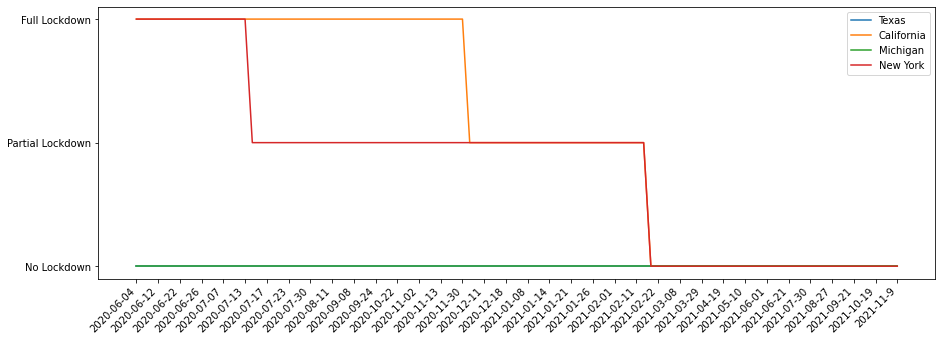

In [62]:
bins = np.array(['No Lockdown', 'Partial Lockdown', 'Full Lockdown'])
x_ticks = data.index

plt.figure(figsize=(15,5))
for s in states:
    plt.plot(data[data['State'] == s].index,data[data['State'] == s]['y_values'])
plt.yticks(np.arange(3), bins)
plt.legend(states)
plt.xticks(x_ticks[::12], rotation = 45, ha='right')
plt.show()